In [ ]:
#|echo: false
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from fastcore.all import *

## Get data

In [ ]:
#|tbl-cap: Data table
path = Path('../../output')
csv_files = L(path.glob('*.csv'))
pat_store = re.compile('(.+)\_\d+')
pat_date = re.compile('.+\_(\d+)')
df = (
    pd.concat([pd.read_csv(o).assign(store=pat_store.match(o.stem)[1], date=pat_date.match(o.stem)[1])
               for o in csv_files])
    .pipe(lambda df: df.assign(
        name=df.name.str.lower(),
        sku=df.id.where(df.sku.isna(), df.sku).astype(int),
        date=pd.to_datetime(df.date)
    ))
    .drop('id', axis=1)
)
df.sample(3)

,brand,uri,name,price,category,store,date,sku
4288,Braedt,https://www.metro.pe/salchicha-vienesa-braedt-...,salchicha vienesa braedt paquete 500 g,12.8,https://www.metro.pe/embutidos-y-fiambres/embu...,metro,2022-08-31,8795
814,Metro,https://www.metro.pe/torta-tres-leches-lucuma-...,torta tres leches lúcuma chica 10 porciones,45.9,https://www.metro.pe/panaderia-y-pasteleria/pa...,metro,2022-09-01,936212
12015,KIKKO,NaN,salsa de soya kiko siyau sazonador oriental fr...,4.6,https://www.plazavea.com.pe/abarrotes,plaza_vea,2022-09-26,5230


In [ ]:
#|echo: false
#|output: false
names = df.name[df.name.str.contains(r'(?=.*pollo)(?=.*entero).*') &
                ~df.name.str.contains(r'marinado|aderezo')].unique().tolist()
names

['pollo entero light  x kg',
 'pollo entero fresco metro x kg',
 'pollo entero con menudencia x kg',
 'pollo entero sin menudencia x kg',
 'pollo entero\xa0artisan\xa0libre de antibióticos x kg']

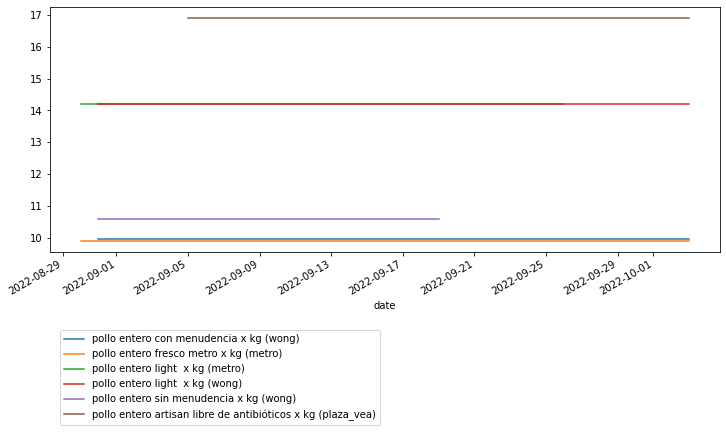

In [ ]:
#|fig-cap: Pollo
fig,ax = plt.subplots(figsize=(12,5))
for n,d in df.loc[df.name.isin(names)].assign(name=lambda d: d.name+' ('+d.store+')').groupby('name'):
    d.plot(x='date', y='price', label=n, ax=ax)
ax.legend(bbox_to_anchor=(0.5,-0.3));

In [ ]:
#|echo: false
#|output: false
names = df.name[df.name.str.contains(r'palta') &
                ~df.name.str.contains(r'shampoo|humectante|vino|salsa|acondicionador|aceite')].unique().tolist()
names

['palta nava metro x kg',
 'palta hass natifrut x kg',
 'palta fuerte metro x kg',
 'palta madura cremosita x kg',
 'palta fuerte madura empacada x kg',
 'palta hass orgánica 1kg',
 'palta fuerte verde x kg',
 'palta nava x kg',
 'palta fuerte malla 1kg z',
 'palta hass',
 'palta fuerte',
 "palta fuerte bell's madura",
 'palta hass madura la caserita empaque 500g',
 'palta naval x kg']

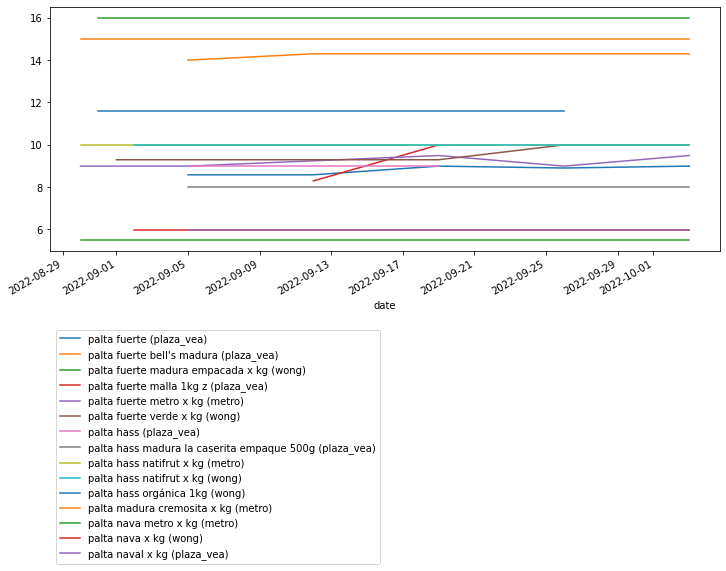

In [ ]:
#|fig-cap: Palta
fig,ax = plt.subplots(figsize=(12,5))
for n,d in df.loc[df.name.isin(names)].assign(name=lambda d: d.name+' ('+d.store+')').groupby('name'):
    d.plot(x='date', y='price', label=n, ax=ax)
ax.legend(bbox_to_anchor=(0.5,-0.3));

In [ ]:
#|echo: false
#|output: false
names = df.name[df.name.str.contains(r'(?=.*aceite)(?=.*vegetal).*') &
                ~df.name.str.contains(r'atun|atún|pack|filete|caballa|tacos|sardinas')].unique().tolist()
names

['aceite vegetal cocinero botella 5 litros',
 'aceite vegetal nicolini 900ml',
 'aceite vegetal primor clásico 1.8l',
 'aceite vegetal metro 900ml',
 'aceite vegetal deleite premium 900ml',
 'aceite vegetal máxima 900ml',
 'aceite vegetal primor clásico 900ml',
 'aceite vegetal cocinero 900ml',
 'aceite vegetal primor corazón 900ml',
 'aceite vegetal primor premium 900ml',
 'aceite vegetal nicolini botella 900ml',
 'aceite vegetal deleite botella 900ml',
 'aceite vegetal primor botella 900ml',
 "aceite vegetal bell's botella 900ml",
 'aceite vegetal mazola canola y girasol spray 142g',
 'aceite vegetal de soya del cielo botella 1l',
 'aceite vegetal cocinero botella 900ml',
 'aceite vegetal nicolini botella 1l',
 'aceite vegetal primor botella 1l',
 "aceite vegetal bell's galonera 5l",
 'aceite vegetal cil botella 900ml',
 'aceite vegetal cocinero botella 1l',
 'aceite vegetal primor botella 1.8l',
 'aceite vegetal del cielo soya bidón 5l',
 'aceite vegetal cocinero botella 1.8l',
 'ac

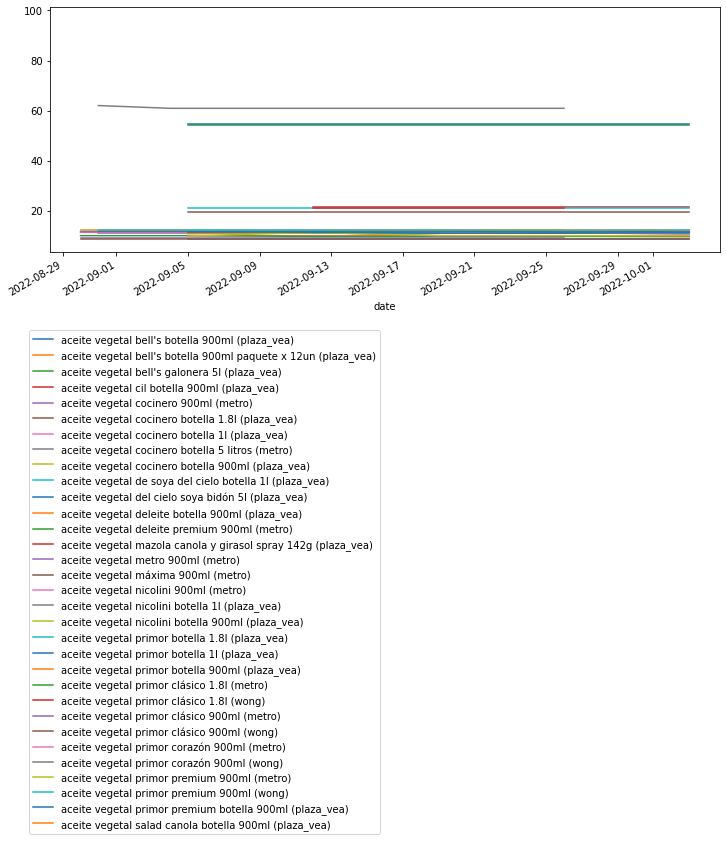

In [ ]:
#|fig-cap: Aceite vegeta
fig,ax = plt.subplots(figsize=(12,5))
for n,d in df.loc[df.name.isin(names)].assign(name=lambda d: d.name+' ('+d.store+')').groupby('name'):
    d.plot(x='date', y='price', label=n, ax=ax)
ax.legend(bbox_to_anchor=(0.5,-0.3));